(704, 1279, 3)


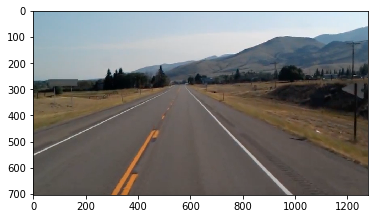

In [3]:
import matplotlib.pylab as plt
import cv2
import numpy as np

image = cv2.imread('C:/Users/piyus/All programming files/Computer_Vision/data/road.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(image.shape)
height = image.shape[0]
width = image.shape[1]

plt.imshow(image)
plt.show()

#### Based on the dimension value of an image we will decide region of interest.

(704, 1279, 3)


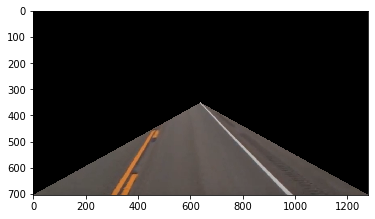

In [13]:
import matplotlib.pylab as plt
import cv2
import numpy as np

image = cv2.imread('C:/Users/piyus/All programming files/Computer_Vision/data/road.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(image.shape)
height = image.shape[0]
width = image.shape[1]

region_of_interest_vertices = [
    (0, height),                    # bottom left most point on image
    (width/2, height/2),            # middle point on image
    (width, height)                 # bottom right most point on image
]

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    channel_count = img.shape[2]
    match_mask_color = (255,) * channel_count        # it means(255,255,255)-->i.e. filling region of int. with white color
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

cropped_image = region_of_interest(image,
                np.array([region_of_interest_vertices], np.int32),)

plt.imshow(cropped_image)
plt.show()

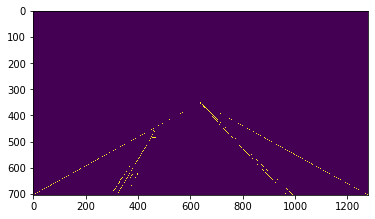

In [14]:
gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2GRAY)
canny_image = cv2.Canny(gray_image, 100, 200)

plt.imshow(canny_image)
plt.show()

* The problem is along with the lane, side boundaries of ROI is also getting detected as edge which we dont want. So Instead of making cropped image as grey image, use the original image.
* Also in the region_of_interest() function we need to make some changes since now we are passing an gray image to it.

(704, 1279, 3)


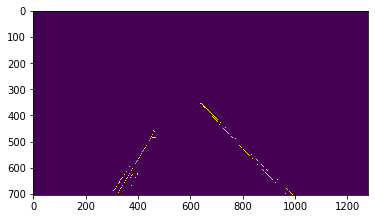

In [17]:
import matplotlib.pylab as plt
import cv2
import numpy as np

image = cv2.imread('C:/Users/piyus/All programming files/Computer_Vision/data/road.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(image.shape)
height = image.shape[0]
width = image.shape[1]

region_of_interest_vertices = [
    (0, height),                    # bottom left most point on image
    (width/2, height/2),            # middle point on image
    (width, height)                 # bottom right most point on image
]

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
canny_image = cv2.Canny(gray_image, 100, 200)

cropped_image = region_of_interest(canny_image,
                np.array([region_of_interest_vertices], np.int32),)


plt.imshow(cropped_image)
plt.show()

### Now its easy to draw a lines over these edges by using Hough Transform ...

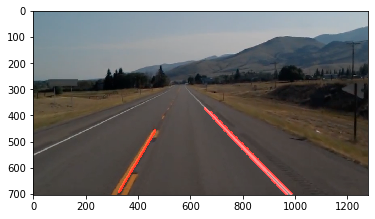

In [21]:
def draw_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (255, 0, 0), thickness=10)       # drawing line on the blank image

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)              # merging both images using addweighted method.
    return img

lines = cv2.HoughLinesP(cropped_image,
                        rho=6,
                        theta=np.pi/180,
                        threshold=160,
                        lines=np.array([]),
                        minLineLength=40,
                        maxLineGap=25)
image_with_lines = draw_the_lines(image, lines)
plt.imshow(image_with_lines)
plt.show()